# A Demonstration of rtmod Pipeline with 3 Signal Transduction Networks

### *Igor Sokolov*
### June 2023

The following is a full demonstration of the rtmod package pipeline with small, medium, and large signal transduction networks. The current implementation does not consider inhibitory relationships, only dependent activation.

To start, we initialize our networks and extract their minimal functional routes:

In [27]:
import igraph, pmodpy
from tabulate import tabulate
from igraph import Graph, plot
from mfrpy import sgmfr
from mfrpy.examplegraphs import igraph_graph
xiao = igraph_graph.xiao_wnt5a
xiao.vs["label"]=xiao.vs["name"]
bordetellae = igraph_graph.bordetellae
dendritic = Graph.Read_GML("mfrpy\examplegraphs\dendrite.gml")
xiao_mfrs = sgmfr.get_mfrs(xiao, [0], 5)[0]
bord_mfrs = sgmfr.get_mfrs(bordetellae, [0], 14)[0]
dend_mfrs = sgmfr.get_mfrs(dendritic, [0,1], 20)[0]

For a small network with only 7 nodes, we use an example graph from Xiao et al. (2007) and consider MFRs from $x_4$ to $x_1$.

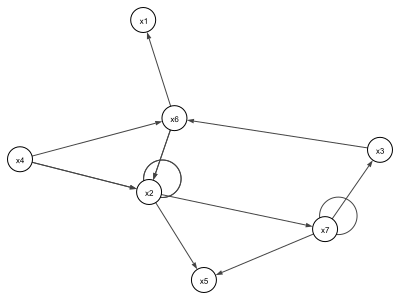

In [42]:
plot(xiao, vertex_label_size = 8, vertex_size = (25), autocurve = False, edge_arrow_size = 0.5, 
     vertex_color = "white", bbox = (400,300))

The human immune response upon infection with *bordetellae* bacteria, taken form Thakar et al. (2007), generates a medium-sized STN (18 nodes). We are interested in routes from **Bacteria** to **Phagocytosis**.

<div>
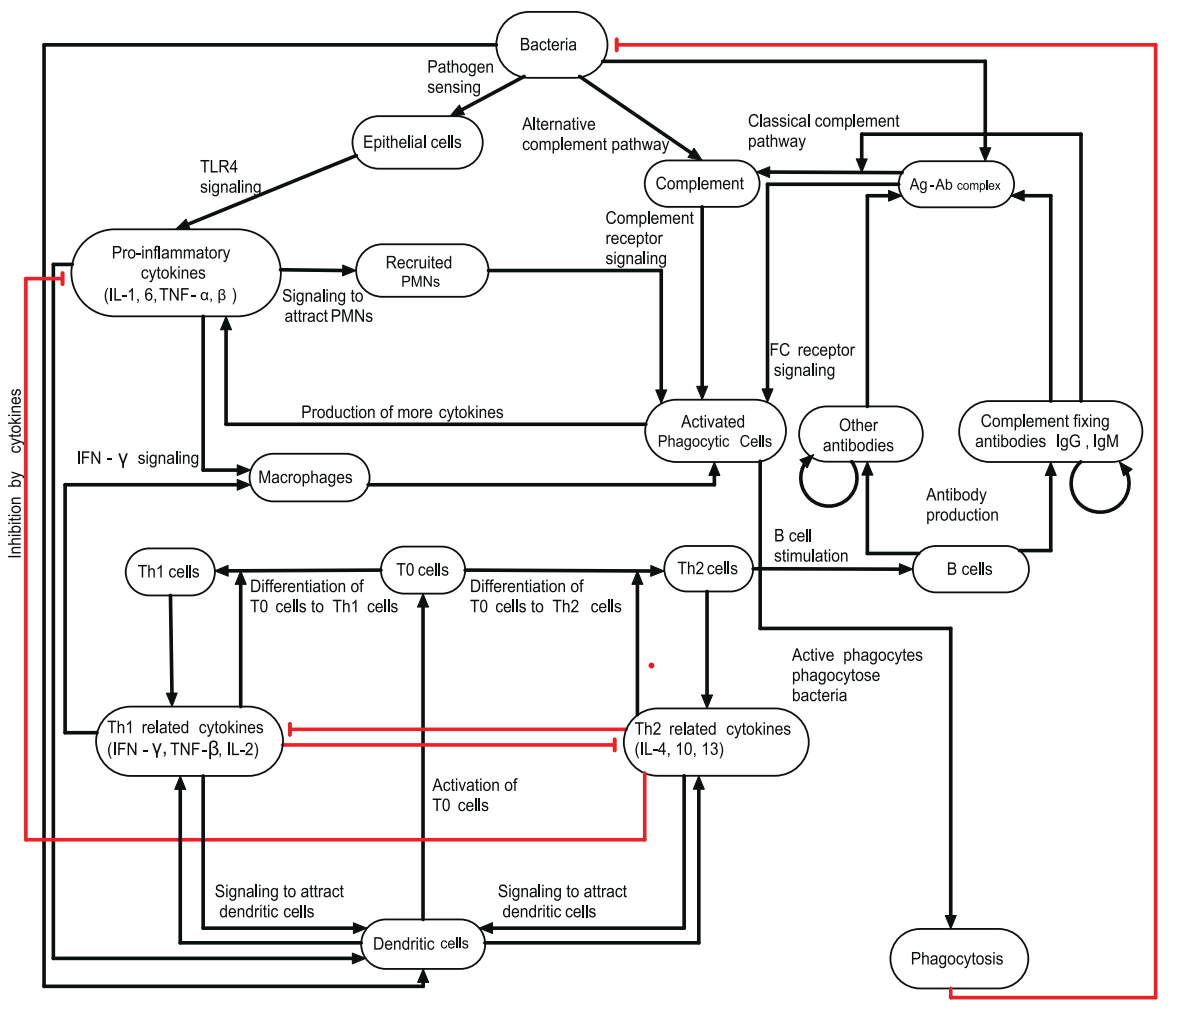
</div>

Finally, a large network with 55 nodes is adapted from Nuñez-Reza et al. (2021) depicting dendritic cell differentiation. We take both **CSF2** and **IL4** as input nodes and **NFKB2** as the output node of interest.

<div>
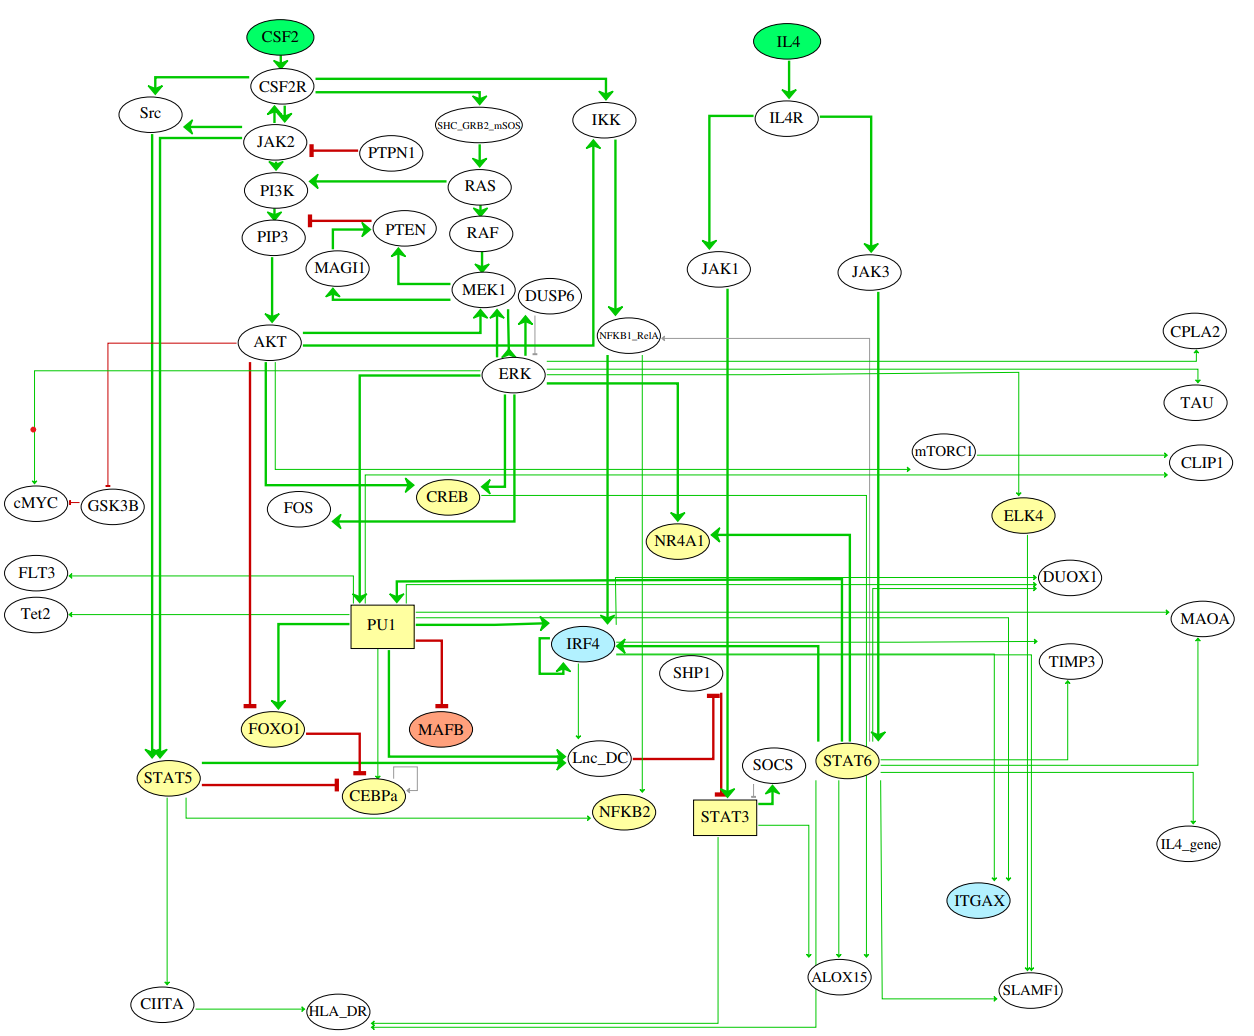
</div>

We compute the modulus for each network using both density and mass optimization.

In [45]:
from pmodpy import modsubfamily
xiao_mod_dens = modsubfamily.modulus_subfamily_density(xiao, xiao_mfrs)
xiao_mod_mass = modsubfamily.modulus_subfamily_mass(xiao, xiao_mfrs)
bord_mod_dens = modsubfamily.modulus_subfamily_density(bordetellae, bord_mfrs)
bord_mod_mass = modsubfamily.modulus_subfamily_mass(bordetellae, bord_mfrs)
dend_mod_dens = modsubfamily.modulus_subfamily_density(dendritic, dend_mfrs)
dend_mod_mass = modsubfamily.modulus_subfamily_mass(dendritic, dend_mfrs)

## Results
The following table summarizes some important results obtained from the methods in rtmod.

In [46]:
print(tabulate(
    [("Graph", "Number of MFRs", "Density Modulus", "Mass Modulus"), 
     ("xiao", len(xiao_mfrs), xiao_mod_dens[0], xiao_mod_mass[0]),
     ("bordetellae", len(bord_mfrs), bord_mod_dens[0], bord_mod_mass[0]),
     ("dendritic", len(dend_mfrs), dend_mod_dens[0], dend_mod_mass[0])], 
               headers = "firstrow", tablefmt = "fancy_grid"))

╒═════════════╤══════════════════╤═══════════════════╤════════════════╕
│ Graph       │   Number of MFRs │   Density Modulus │   Mass Modulus │
╞═════════════╪══════════════════╪═══════════════════╪════════════════╡
│ xiao        │                6 │         0.545455  │      0.55      │
├─────────────┼──────────────────┼───────────────────┼────────────────┤
│ bordetellae │               98 │         0.0731599 │      0.0737089 │
├─────────────┼──────────────────┼───────────────────┼────────────────┤
│ dendritic   │              350 │         0.600429  │      0.600429  │
╘═════════════╧══════════════════╧═══════════════════╧════════════════╛


Additionally, we obtain the most likely MFRs for a random signal to transpose on from the probabilistic interpretation of the 2-modulus. The following table lists the probabilities for the top 5 most likely MFRs in each network.

In [60]:
xiao_top_probs = sorted(xiao_mod_mass[1], reverse = True)
bord_top_probs = sorted(bord_mod_mass[1], reverse = True)
dend_top_probs = sorted(dend_mod_mass[1], reverse = True)

print(tabulate(
    [("xiao", "bordetellae", "dendritic"),
     (xiao_top_probs[0], bord_top_probs[0], dend_top_probs[0]),
     (xiao_top_probs[1], bord_top_probs[1], dend_top_probs[1]),
     (xiao_top_probs[2], bord_top_probs[2], dend_top_probs[2]),
     (xiao_top_probs[3], bord_top_probs[3], dend_top_probs[3]),
     (xiao_top_probs[4], bord_top_probs[4], dend_top_probs[4])        
    ],
     headers = "firstrow", tablefmt = "fancy_grid"
))

╒═════════════╤═══════════════╤═════════════╕
│        xiao │   bordetellae │   dendritic │
╞═════════════╪═══════════════╪═════════════╡
│ 0.818201    │     0.199079  │   0.277959  │
├─────────────┼───────────────┼─────────────┤
│ 0.0909151   │     0.181327  │   0.232144  │
├─────────────┼───────────────┼─────────────┤
│ 0.0908836   │     0.151493  │   0.224052  │
├─────────────┼───────────────┼─────────────┤
│ 1.08063e-07 │     0.122752  │   0.204563  │
├─────────────┼───────────────┼─────────────┤
│ 1.08063e-07 │     0.0646759 │   0.0248957 │
╘═════════════╧═══════════════╧═════════════╛


## References

Nuñez-Reza KJ, Naldi A, Sánchez-Jiménez A, Leon-Apodaca AV, Santana MA, Thomas-Chollier M, Thieffry D, MedinaRivera A. 2021 Logical modelling of in vitro differentiation of human monocytes into dendritic cells unravels novel transcriptional  regulatory interactions. Interface Focus 11: 20200061. https://doi.org/10.1098/rsfs.2020.0061.

Thakar J, Pilione M, Kirimanjeswara G, Harvill ET, Albert R (2007) Modeling systems-level regulation of host immune responses. PLoS Comput Biol 3(6): e109. https://doi.org/10.1371/journal.pcbi.0030109.

Yufei Xiao , Edward R. Dougherty, The impact of function perturbations in Boolean networks, Bioinformatics, Volume 23, Issue 10, May 2007, Pages 1265–1273, https://doi.org/10.1093/bioinformatics/btm093.
